<a href="https://colab.research.google.com/github/MarouaHY/arabic-handwritten-cnn/blob/main/Deep_Learning_Architectures_for_Offline_Handwritte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

marouahy_datamla_path = kagglehub.dataset_download('marouahy/datamla')
marouahy_mobilenet_path = kagglehub.dataset_download('marouahy/mobilenet')
marouahy_efficientnetb0_path = kagglehub.dataset_download('marouahy/efficientnetb0')
marouahy_resnet50v2_path = kagglehub.dataset_download('marouahy/resnet50v2')
marouahy_cifar_py_path = kagglehub.dataset_download('marouahy/cifar-py')
marouahy_densenet_path = kagglehub.dataset_download('marouahy/densenet')
marouahy_data_mla_path = kagglehub.dataset_download('marouahy/data-mla')

print('Data source import complete.')


# Image Data Preparation and Directory Structure Validation for Grayscale Image Classification

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# The main directory for data
DATA_FOLDER = '/kaggle/input/datamla/IFN-INI_T_T_V'

# Initialize the ImageDataGenerator with scaling
train_datagen = ImageDataGenerator(rescale=1./255)

# Create the train generator
train_generator = train_datagen.flow_from_directory(
    DATA_FOLDER,                   # Main directory path
    target_size=(128, 128),        # Resize to 128x128
    color_mode='grayscale',        # Working with grayscale images
    batch_size=32,                 # Number of images to return in one batch
    class_mode='categorical'       # For multi-class classification
)

# Print the class labels that were automatically extracted
print("Classes in dataset:", train_generator.class_indices)

Found 89567 images belonging to 3 classes.
Classes in dataset: {'test': 0, 'train': 1, 'val': 2}


# Checking File and Subdirectory Structure in Image Dataset Folders

In [ ]:
import os

def check_dir_structure(base_dir):
    for root, dirs, files in os.walk(base_dir):
        print("Directory:", root)
        print("Subdirectories:", dirs)
        print("Number of files:", len(files))
        print("---")

check_dir_structure('/kaggle/input/datamla/IFN-INI_T_T_V/train')
check_dir_structure('/kaggle/input/datamla/IFN-INI_T_T_V/test')
check_dir_structure('/kaggle/input/datamla/IFN-INI_T_T_V/val')

Directory: /kaggle/input/datamla/IFN-INI_T_T_V/train
Subdirectories: ['DaLE', 'AynM', 'RaaE', 'qafI', 'LamB', 'KafE', 'SaadB', 'KhaM', 'JeemI', 'TtaaI', 'NoonI', 'SheenM', 'HaI', 'NoonM', 'FaaE', 'YaaE', 'ThaaI', 'HaaB', 'MeemI', 'AlefE', 'ThaaB', 'GhynE', 'qafE', 'TaaI', 'ThaaE', 'JeemE', 'SeenE', 'FaaM', 'NoonB', 'YaaI', 'DadI', 'KhaE', 'NoonE', 'BaaB', 'LamM', 'BaaM', 'SeenB', 'KhaB', 'HaaM', 'TaaE', 'KhaI', 'SaadM', 'GhynB', 'SaadI', 'KafB', 'DhaLE', 'BaaI', 'JeemB', 'GhynI', 'ZayI', 'DaLI', 'KafI', 'SheenE', 'YaaM', 'TtaaB', 'SheenI', 'qafM', 'GhynM', 'qafB', 'AynI', 'DadB', 'dhaaI', 'BaaE', 'ThaaM', 'LamE', 'ZayE', 'dhaaB', 'WawI', 'WawE', 'YaaB', 'LamI', 'FaaI', 'SeenI', 'AynE', 'SeenM', 'TaaB', 'DadM', 'DhaLI', 'HaaI', 'SaadE', 'AlefI', 'RaaI', 'AynB', 'SheenB', 'dhaaM', 'KafM', 'FaaB', 'HaaE', 'DadE', 'TtaaM', 'TaaM']
Number of files: 0
---
Directory: /kaggle/input/datamla/IFN-INI_T_T_V/train/DaLE
Subdirectories: []
Number of files: 1037
---
Directory: /kaggle/input/datamla/IF

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the ImageDataGenerator for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/kaggle/input/datamla/IFN-INI_T_T_V/train'
valid_dir = '/kaggle/input/datamla/IFN-INI_T_T_V/val'
test_dir = '/kaggle/input/datamla/IFN-INI_T_T_V/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=40,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=40,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=40,
    class_mode='categorical'
)

Found 62626 images belonging to 91 classes.
Found 13451 images belonging to 91 classes.
Found 13490 images belonging to 91 classes.


# CNN

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(91, activation='softmax')  # Output layer for 91 classes
])


# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 91)                  │          11,739 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,404,059 (28.24 MB)

 Trainable params: 7,404,059 (28.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(91, activation='softmax')  # Output layer for 91 classes
])


# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',  # Suitable for multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 923s 588ms/step - accuracy: 0.4385 - loss: 2.3129 - val_accuracy: 0.7707 - val_loss: 0.7663
Epoch 2/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 894s 571ms/step - accuracy: 0.8556 - loss: 0.4812 - val_accuracy: 0.8024 - val_loss: 0.6590
Epoch 3/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 897s 572ms/step - accuracy: 0.9453 - loss: 0.1769 - val_accuracy: 0.8118 - val_loss: 0.6887
Epoch 4/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 945s 587ms/step - accuracy: 0.9731 - loss: 0.0897 - val_accuracy: 0.8145 - val_loss: 0.7943
Epoch 5/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 895s 571ms/step - accuracy: 0.9812 - loss: 0.0687 - val_accuracy: 0.8256 - val_loss: 0.7992
Epoch 6/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 920s 570ms/step - accuracy: 0.9835 - loss: 0.0561 - val_accuracy: 0.8121 - val_loss: 1.0045
Epoch 7/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 930s 575ms/step - accuracy: 0.9876 - loss: 0.0444 - val_accuracy: 0.8237 - val_loss: 0.8934
Epoch 8/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 923s 589ms/step - ac

# Image Data Preprocessing and Batch Generation for Training and Validation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = datagen.flow_from_directory(
    '/kaggle/input/datamla/IFN-INI_T_T_V/train',
    target_size=(128, 128),
    batch_size=40,
    class_mode='categorical'
)

valid_generator = datagen.flow_from_directory(
    '/kaggle/input/datamla/IFN-INI_T_T_V/val',
    target_size=(128, 128),
    batch_size=40,
    class_mode='categorical'
)


Found 62626 images belonging to 91 classes.
Found 13451 images belonging to 91 classes.


# MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load pre-trained MobileNetV2 without the top layer
base_model = MobileNetV2(
    weights='/kaggle/input/mobilenet/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_128_no_top.h5',
    include_top=False,
    input_shape=(128, 128, 3)
)

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Regularization
    layers.Dense(91, activation='softmax')  # Adjust for the number of classes
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)


Epoch 1/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 587s 370ms/step - accuracy: 0.4468 - loss: 2.1576 - val_accuracy: 0.8008 - val_loss: 0.6479
Epoch 2/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 548s 350ms/step - accuracy: 0.7438 - loss: 0.8173 - val_accuracy: 0.8239 - val_loss: 0.5540
Epoch 3/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 561s 358ms/step - accuracy: 0.7787 - loss: 0.6863 - val_accuracy: 0.8352 - val_loss: 0.5207
Epoch 4/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 560s 357ms/step - accuracy: 0.8026 - loss: 0.6117 - val_accuracy: 0.8436 - val_loss: 0.4906
Epoch 5/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 577s 368ms/step - accuracy: 0.8196 - loss: 0.5542 - val_accuracy: 0.8536 - val_loss: 0.4655
Epoch 6/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 563s 359ms/step - accuracy: 0.8252 - loss: 0.5367 - val_accuracy: 0.8588 - val_loss: 0.4439
Epoch 7/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 563s 359ms/step - accuracy: 0.8330 - loss: 0.5043 - val_accuracy: 0.8519 - val_loss: 0.4603
Epoch 8/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 622s 397ms/step - ac

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1.0/255,       # Normalize pixel values to [0, 1]
    rotation_range=20,     # Random rotation
    width_shift_range=0.2, # Random horizontal shift
    height_shift_range=0.2,# Random vertical shift
    shear_range=0.2,       # Shear transformation
    zoom_range=0.2,        # Zoom augmentation
    horizontal_flip=True,  # Random horizontal flipping
    fill_mode='nearest'    # Fill in missing pixels after augmentation
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/datamla/IFN-INI_T_T_V/train',  # Replace with the path to your training data
    target_size=(128, 128),   # Resize images to match input shape
    batch_size=40,            # Number of images per batch
    class_mode='categorical'  # For multi-class classification
)

valid_generator = valid_datagen.flow_from_directory(
    '/kaggle/input/datamla/IFN-INI_T_T_V/val',  # Replace with the path to your validation data
    target_size=(128, 128),
    batch_size=40,
    class_mode='categorical'
)


Found 62626 images belonging to 91 classes.
Found 13451 images belonging to 91 classes.


# EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# Load pre-trained EfficientNetB0 without the top layer
base_model = EfficientNetB0(
    weights='/kaggle/input/efficientnetb0/efficientnetb0_notop.h5',
    include_top=False,
    input_shape=(128, 128, 3)
)

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers
inputs = layers.Input(shape=(128, 128, 3))  # Explicitly define the input shape
x = base_model(inputs, training=False)  # Pass the input through the base model
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)  # Regularization
outputs = layers.Dense(91, activation='softmax')(x)  # 91 classes

# Create the final model
model = models.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 4, 4, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 91)                  │          11,739 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,225,278 (16.12 MB)

 Trainable params: 175,707 (686.36 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# Load pre-trained EfficientNetB0 without the top layer
base_model = EfficientNetB0(
    weights='/kaggle/input/efficientnetb0/efficientnetb0_notop.h5',
    include_top=False,
    input_shape=(128, 128, 3)
)

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Regularization
    layers.Dense(91, activation='softmax')  # 91 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1566/1566 ━━━━━━━━━━━━━━━━━━━━ 975s 613ms/step - accuracy: 0.0232 - loss: 4.4625 - val_accuracy: 0.0280 - val_loss: 4.4309
Epoch 2/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 890s 567ms/step - accuracy: 0.0280 - loss: 4.4376 - val_accuracy: 0.0235 - val_loss: 4.4310
Epoch 3/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 889s 567ms/step - accuracy: 0.0272 - loss: 4.4389 - val_accuracy: 0.0280 - val_loss: 4.4308
Epoch 4/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 894s 570ms/step - accuracy: 0.0290 - loss: 4.4347 - val_accuracy: 0.0280 - val_loss: 4.4347
Epoch 5/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 896s 571ms/step - accuracy: 0.0274 - loss: 4.4346 - val_accuracy: 0.0280 - val_loss: 4.4310
Epoch 6/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 901s 574ms/step - accuracy: 0.0277 - loss: 4.4301 - val_accuracy: 0.0280 - val_loss: 4.4322
Epoch 7/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 898s 572ms/step - accuracy: 0.0281 - loss: 4.4314 - val_accuracy: 0.0280 - val_loss: 4.4303
Epoch 8/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 907s 578ms/step - accuracy: 0.0

# AlexNet

In [ ]:
from tensorflow.keras import layers, models

# Define AlexNet model
model = models.Sequential([
    layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(91, activation='softmax')  # 91 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 30, 30, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 91)                  │         372,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,099,739 (95.75 MB)

 Trainable params: 25,099,739 (95.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import layers, models

# Define AlexNet model
model = models.Sequential([
    layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(91, activation='softmax')  # 91 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

Epoch 1/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1450s 923ms/step - accuracy: 0.0266 - loss: 4.4543 - val_accuracy: 0.0228 - val_loss: 4.4325
Epoch 2/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1448s 914ms/step - accuracy: 0.0280 - loss: 4.4350 - val_accuracy: 0.0280 - val_loss: 4.4317
Epoch 3/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1474s 922ms/step - accuracy: 0.0281 - loss: 4.4346 - val_accuracy: 0.0280 - val_loss: 4.4314
Epoch 4/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1442s 919ms/step - accuracy: 0.0275 - loss: 4.4339 - val_accuracy: 0.0280 - val_loss: 4.4312
Epoch 5/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1418s 904ms/step - accuracy: 0.0274 - loss: 4.4342 - val_accuracy: 0.0280 - val_loss: 4.4310
Epoch 6/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1472s 910ms/step - accuracy: 0.0276 - loss: 4.4341 - val_accuracy: 0.0280 - val_loss: 4.4308
Epoch 7/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1429s 912ms/step - accuracy: 0.0285 - loss: 4.4324 - val_accuracy: 0.0280 - val_loss: 4.4306
Epoch 8/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1462s 912ms/s

# ResNet50V2

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import layers, models

# Load pre-trained ResNet50V2 without the top layer
base_model = ResNet50V2(
    weights='/kaggle/input/resnet50v2/resnet50v2_weights_tf_dim_ordering_tf_kernels_notop.h5',
    include_top=False,
    input_shape=(128, 128, 3)
)

# Freeze the base model layers
base_model.trainable = False

# Define the input tensor
inputs = layers.Input(shape=(128, 128, 3))

# Pass the input through the base model
x = base_model(inputs, training=False)  # Set training=False to disable BatchNormalization updates

# Add custom classification layers
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)  # Regularization
outputs = layers.Dense(91, activation='softmax')(x)  # 91 classes

# Create the final model
model = models.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50v2 (Functional)              │ (None, 4, 4, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 91)                  │          11,739 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,838,811 (90.94 MB)

 Trainable params: 274,011 (1.05 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import layers, models

# Load pre-trained ResNet50V2 without the top layer
base_model = ResNet50V2(
    weights='/kaggle/input/resnet50v2/resnet50v2_weights_tf_dim_ordering_tf_kernels_notop.h5',
    include_top=False,
    input_shape=(128, 128, 3)
)
# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Regularization
    layers.Dense(91, activation='softmax')  # 91 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

Epoch 1/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1932s 1s/step - accuracy: 0.2474 - loss: 3.0372 - val_accuracy: 0.5672 - val_loss: 1.4175
Epoch 2/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1897s 1s/step - accuracy: 0.4676 - loss: 1.8143 - val_accuracy: 0.6101 - val_loss: 1.2438
Epoch 3/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1903s 1s/step - accuracy: 0.5090 - loss: 1.6517 - val_accuracy: 0.6429 - val_loss: 1.1226
Epoch 4/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1909s 1s/step - accuracy: 0.5239 - loss: 1.5921 - val_accuracy: 0.6560 - val_loss: 1.0720
Epoch 5/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1949s 1s/step - accuracy: 0.5387 - loss: 1.5242 - val_accuracy: 0.6526 - val_loss: 1.0954
Epoch 6/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1910s 1s/step - accuracy: 0.5473 - loss: 1.5041 - val_accuracy: 0.6657 - val_loss: 1.0297
Epoch 7/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1911s 1s/step - accuracy: 0.5487 - loss: 1.4845 - val_accuracy: 0.6656 - val_loss: 1.0278
Epoch 8/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 1909s 1s/step - accuracy: 0.5578 -

# LetNet

In [ ]:
from tensorflow.keras import layers, models

# Define LeNet model
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(91, activation='softmax')  # 91 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 124, 124, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 62, 62, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 58, 58, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 29, 29, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 13456)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 120)                 │       1,614,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 91)                  │           7,735 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,635,611 (6.24 MB)

 Trainable params: 1,635,611 (6.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1.0/255,       # Normalize pixel values to [0, 1]
    rotation_range=20,     # Random rotation
    width_shift_range=0.2, # Random horizontal shift
    height_shift_range=0.2,# Random vertical shift
    shear_range=0.2,       # Shear transformation
    zoom_range=0.2,        # Zoom augmentation
    horizontal_flip=True,  # Random horizontal flipping
    fill_mode='nearest'    # Fill in missing pixels after augmentation
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/datamla/IFN-INI_T_T_V/train',  # Replace with the path to your training data
    target_size=(128, 128),   # Resize images to match input shape
    batch_size=40,            # Number of images per batch
    class_mode='categorical'  # For multi-class classification
)

valid_generator = valid_datagen.flow_from_directory(
    '/kaggle/input/datamla/IFN-INI_T_T_V/val',  # Replace with the path to your validation data
    target_size=(128, 128),
    batch_size=40,
    class_mode='categorical'
)


Found 62626 images belonging to 91 classes.
Found 13451 images belonging to 91 classes.


In [ ]:
from tensorflow.keras import layers, models

# Define LeNet model
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(91, activation='softmax')  # 91 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1566/1566 ━━━━━━━━━━━━━━━━━━━━ 704s 447ms/step - accuracy: 0.0846 - loss: 3.8817 - val_accuracy: 0.3316 - val_loss: 2.2429
Epoch 2/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 573s 365ms/step - accuracy: 0.3483 - loss: 2.2174 - val_accuracy: 0.5019 - val_loss: 1.5840
Epoch 3/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 568s 362ms/step - accuracy: 0.4581 - loss: 1.7567 - val_accuracy: 0.5400 - val_loss: 1.4135
Epoch 4/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 556s 354ms/step - accuracy: 0.5161 - loss: 1.5614 - val_accuracy: 0.5999 - val_loss: 1.2491
Epoch 5/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 576s 367ms/step - accuracy: 0.5509 - loss: 1.4403 - val_accuracy: 0.6081 - val_loss: 1.2329
Epoch 6/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 566s 361ms/step - accuracy: 0.5791 - loss: 1.3226 - val_accuracy: 0.4711 - val_loss: 1.7372
Epoch 7/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 579s 369ms/step - accuracy: 0.6032 - loss: 1.2566 - val_accuracy: 0.5707 - val_loss: 1.3763
Epoch 8/10
1566/1566 ━━━━━━━━━━━━━━━━━━━━ 608s 360ms/step - accuracy: 0.6

# GoogleNet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Define the Inception module
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    # 1x1 convolution branch
    branch1x1 = layers.Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    # 3x3 convolution branch
    branch3x3 = layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    branch3x3 = layers.Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(branch3x3)

    # 5x5 convolution branch
    branch5x5 = layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    branch5x5 = layers.Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(branch5x5)

    # Max pooling branch
    branch_pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = layers.Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(branch_pool)

    # Concatenate all branches
    output = layers.concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the GoogleNet (InceptionV1) model for 128x128 input
def build_googlenet_128x128(input_shape=(128, 128, 3), num_classes=91):
    inputs = Input(shape=input_shape)

    # Initial layers
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, 64, 96, 128, 16, 32, 32)  # Inception 3a
    x = inception_module(x, 128, 128, 192, 32, 96, 64)  # Inception 3b
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, 192, 96, 208, 16, 48, 64)  # Inception 4a
    x = inception_module(x, 160, 112, 224, 24, 64, 64)  # Inception 4b
    x = inception_module(x, 128, 128, 256, 24, 64, 64)  # Inception 4c
    x = inception_module(x, 112, 144, 288, 32, 64, 64)  # Inception 4d
    x = inception_module(x, 256, 160, 320, 32, 128, 128)  # Inception 4e
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, 256, 160, 320, 32, 128, 128)  # Inception 5a
    x = inception_module(x, 384, 192, 384, 48, 128, 128)  # Inception 5b

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = models.Model(inputs, outputs, name='GoogleNet_128x128')
    return model

# Build the model
input_shape = (128, 128, 3)  # Input shape for 128x128
num_classes = 91  # Number of classes (adjust based on your dataset)
model = build_googlenet_128x128(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Data Preparation
train_dir = '/kaggle/input/datamla/IFN-INI_T_T_V/train'  # Path to training data
val_dir = '/kaggle/input/datamla/IFN-INI_T_T_V/val'  # Path to validation data

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate predictions
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=list(val_generator.class_indices.keys()))
print("Classification Report:")
print(class_report)

Model: "GoogleNet_128x128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 64, 64, 64)     │          9,472 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_13          │ (None, 32, 32, 64)     │              0 │ conv2d_57[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 32, 64)     │            256 │ max_pooling2d_13[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 32, 32, 64)     │          4,160 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 32, 32, 192)    │        110,784 │ conv2d_58[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 32, 32, 192)    │            768 │ conv2d_59[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_14          │ (None, 16, 16, 192)    │              0 │ batch_normalization_3… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_61 (Conv2D)        │ (None, 16, 16, 96)     │         18,528 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_63 (Conv2D)        │ (None, 16, 16, 16)     │          3,088 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_15          │ (None, 16, 16, 192)    │              0 │ max_pooling2d_14[0][0] │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_60 (Conv2D)        │ (None, 16, 16, 64)     │         12,352 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_62 (Conv2D)        │ (None, 16, 16, 128)    │        110,720 │ conv2d_61[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_64 (Conv2D)        │ (None, 16, 16, 32)     │         12,832 │ conv2d_63[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_65 (Conv2D)        │ (None, 16, 16, 32)     │          6,176 │ max_pooling2d_15[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_9             │ (None, 16, 16, 256)    │              0 │ conv2d_60[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_62[0][0],       │
│                      

 Total params: 6,067,851 (23.15 MB)

 Trainable params: 6,067,339 (23.15 MB)

 Non-trainable params: 512 (2.00 KB)

Found 62626 images belonging to 91 classes.
Found 13451 images belonging to 91 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1957/1957 ━━━━━━━━━━━━━━━━━━━━ 3045s 2s/step - accuracy: 0.1022 - loss: 3.7680 - val_accuracy: 0.3241 - val_loss: 2.3786
Epoch 2/10
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 2s 116us/step - accuracy: 0.5625 - loss: 1.4743 - val_accuracy: 0.1818 - val_loss: 2.4790
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1957/1957 ━━━━━━━━━━━━━━━━━━━━ 3004s 2s/step - accuracy: 0.6145 - loss: 1.2686 - val_accuracy: 0.7897 - val_loss: 0.6780
Epoch 4/10
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 2s 78us/step - accuracy: 0.6562 - loss: 1.0353 - val_accuracy: 0.8182 - val_loss: 0.9279
Epoch 5/10
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 2959s 2s/step - accuracy: 0.7441 - loss: 0.8377 - val_accuracy: 0.7298 - val_loss: 0.8959
Epoch 6/10
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 2s 85us/step - accuracy: 0.7500 - loss: 0.6689 - val_accuracy: 0.7273 - val_loss: 0.7767
Epoch 7/10
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 2952s 2s/step - accuracy: 0.7810 - loss: 0.7149 - val_accuracy: 0.8371 - val_loss: 0.5439
Epoch 8/10
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 3s 587us/step - accuracy: 0.8438 - loss: 0.4554 - val_accuracy: 0.7273 - val_loss: 0.7176
Epoch 9/10
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 2874s 1s/step - accuracy: 0.7992 - loss: 0.6572 - val_accuracy: 0.7675 - val_loss: 0.8493
Epoch 10/10
1957/1957 ━━━━━━━━━━━━━━━━━━━━ 2s 78us/step - accuracy: 0.6875 - loss: 1.2278

# DenseNet

Found 62626 images belonging to 91 classes.
Found 13451 images belonging to 91 classes.


Model: "DenseNet121_FineTuned"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 4, 4, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 91)                  │          23,387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,323,291 (27.94 MB)

 Trainable params: 285,787 (1.09 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1565/1565 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0904 - loss: 4.1085

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2930s 2s/step - accuracy: 0.0905 - loss: 4.1082 - val_accuracy: 0.4097 - val_loss: 2.3627
Epoch 2/10
   1/1565 ━━━━━━━━━━━━━━━━━━━━ 40:16 2s/step - accuracy: 0.3000 - loss: 3.0045

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 529us/step - accuracy: 0.3000 - loss: 3.0045 - val_accuracy: 0.0909 - val_loss: 2.6351
Epoch 3/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2923s 2s/step - accuracy: 0.3055 - loss: 2.6586 - val_accuracy: 0.5223 - val_loss: 1.7881
Epoch 4/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 337us/step - accuracy: 0.4250 - loss: 2.3094 - val_accuracy: 0.6364 - val_loss: 1.8384
Epoch 5/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2909s 2s/step - accuracy: 0.4023 - loss: 2.1697 - val_accuracy: 0.5803 - val_loss: 1.5147
Epoch 6/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 337us/step - accuracy: 0.3750 - loss: 2.1186 - val_accuracy: 0.4545 - val_loss: 1.6683
Epoch 7/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2903s 2s/step - accuracy: 0.4499 - loss: 1.9266 - val_accuracy: 0.6232 - val_loss: 1.3521
Epoch 8/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2s 337us/step - accuracy: 0.5250 - loss: 1.8889 - val_accuracy: 0.4545 - val_loss: 2.0193
Epoch 9/10
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 2913s 2s/step - accuracy: 0.4890 - loss: 1.76

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


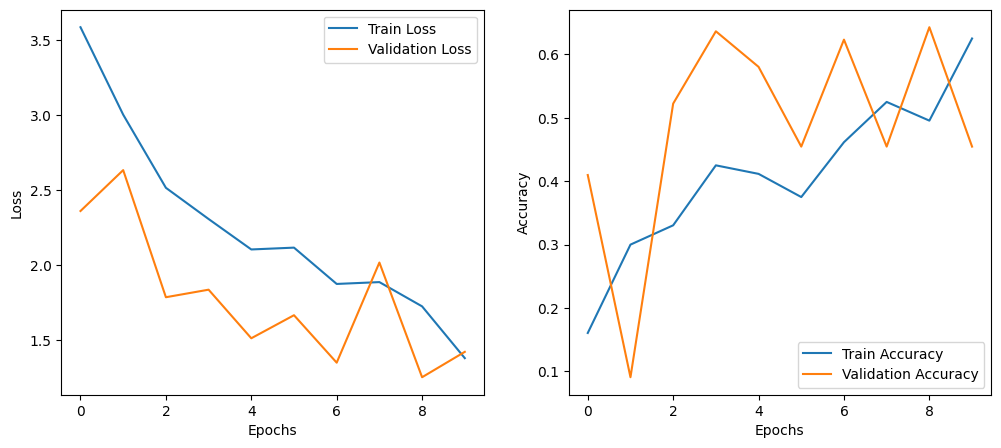

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Enable mixed precision training (if using a GPU)
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# Define paths to your dataset
train_dir = '/kaggle/input/datamla/IFN-INI_T_T_V/train'  # Path to training data
val_dir = '/kaggle/input/datamla/IFN-INI_T_T_V/val'      # Path to validation data

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create data generators
batch_size = 40 # Reduced batch size
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained DenseNet121 model (without the top classification layer)
# Load pre-trained DenseNet121 model with local weights
weights_path = '/kaggle/input/densenet/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5'

base_model = DenseNet121(weights=weights_path, include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers
inputs = Input(shape=(128, 128, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(train_generator.num_classes, activation='softmax', dtype='float32')(x)  # Ensure output is float32

# Create the model
model = models.Model(inputs, outputs, name='DenseNet121_FineTuned')

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Callbacks
tensorboard_callback = TensorBoard(log_dir='./logs')  # TensorBoard for visualization
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Early stopping

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10,  # Increase the number of epochs
    callbacks=[tensorboard_callback, early_stopping_callback]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate predictions
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred_classes, target_names=list(val_generator.class_indices.keys()))
print("Classification Report:")
print(class_report)

# Plot training/validation loss and accuracy
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# ZFNET


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt


# Define paths to your dataset
train_dir = '/kaggle/input/datamla/IFN-INI_T_T_V/train'  # Path to training data
val_dir = '/kaggle/input/datamla/IFN-INI_T_T_V/val'      # Path to validation data

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create data generators
batch_size = 64  # Increased batch size
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical'
)

# Convert ImageDataGenerator to tf.data.Dataset
def create_dataset(generator):
    dataset = tf.data.Dataset.from_generator(
        lambda: generator,
        output_signature=(
            tf.TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, train_generator.num_classes), dtype=tf.float32)
        )
    )
    return dataset

train_dataset = create_dataset(train_generator)
val_dataset = create_dataset(val_generator)

# Optimize the dataset
train_dataset = train_dataset.cache().prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(tf.data.AUTOTUNE)

# Define the ZFNet model
def build_zfnet(input_shape=(128, 128, 3), num_classes=10):
    inputs = Input(shape=input_shape)

    # Layer 1
    x = layers.Conv2D(96, (7, 7), strides=(2, 2), padding='valid', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = layers.BatchNormalization()(x)

    # Layer 2
    x = layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = layers.BatchNormalization()(x)

    # Layer 3
    x = layers.Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu')(x)

    # Layer 4
    x = layers.Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu')(x)

    # Layer 5
    x = layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Fully Connected Layers
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    # Output Layer
    outputs = layers.Dense(num_classes, activation='softmax', dtype='float32')(x)

    # Create the model
    model = models.Model(inputs, outputs, name='ZFNet')
    return model

# Build the ZFNet model
zfnet_model = build_zfnet(input_shape=(128, 128, 3), num_classes=train_generator.num_classes)

# Compile the model
zfnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Print the model summary
zfnet_model.summary()

# Callbacks
tensorboard_callback = TensorBoard(log_dir='./logs')  # TensorBoard for visualization
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Early stopping

# Train the ZFNet model
history_zfnet = zfnet_model.fit(
    train_dataset,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_dataset,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10,
    callbacks=[tensorboard_callback, early_stopping_callback]
)

# Evaluate the ZFNet model
test_loss_zfnet, test_accuracy_zfnet = zfnet_model.evaluate(val_dataset)
print(f"ZFNet Test Accuracy: {test_accuracy_zfnet * 100:.2f}%")

Found 62626 images belonging to 91 classes.
Found 13451 images belonging to 91 classes.


Model: "ZFNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 61, 61, 96)          │          14,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 15, 15, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       9,441,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 91)                  │         372,827 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,323,291 (115.67 MB)

 Trainable params: 30,322,587 (115.67 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 2276s 2s/step - accuracy: 0.1743 - loss: 3.4140 - val_accuracy: 0.3299 - val_loss: 2.4757
Epoch 2/10
866/978 ━━━━━━━━━━━━━━━━━━━━ 4:08 2s/step - accuracy: 0.6424 - loss: 1.1435